In [11]:
import numpy as np
import pymc as pm
import math
from matplotlib import pyplot as plt

In [12]:
a = np.random.poisson(lam=10, size=100) 
b = np.random.poisson(lam=5, size=50) 
c = np.random.poisson(lam=15, size=120) 

data = np.hstack((a,b,c))

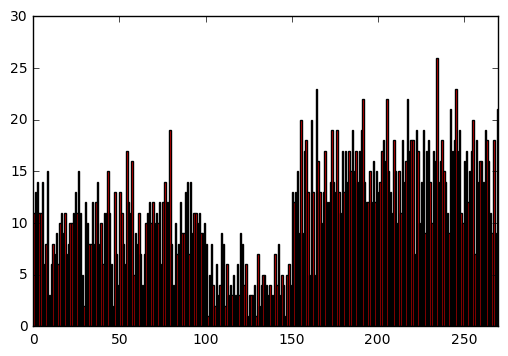

In [13]:
n = len(data)
plt.bar(np.arange(n), data, color='r')
plt.xlim(0,n)

plt.show()

In [14]:
alpha = 1.0 / data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)
lambda_4 = pm.Exponential("lambda_4", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=0, upper=n)
tau_3 = pm.DiscreteUniform("tau_3", lower=0, upper=n)

In [15]:
@pm.deterministic
def lambda_(tau=tau, tau_2=tau_2, tau_3=tau_3,  lambda_1=lambda_1, lambda_2=lambda_2, lambda_3=lambda_3, lambda_4=lambda_4):
    out = np.zeros(n)
    out[:tau] = lambda_1
    out[tau:tau_2] = lambda_2
    out[tau_2:tau_3] = lambda_3
    out[tau_3:] = lambda_4
    return out

observation = pm.Poisson("obs", lambda_, value=data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, lambda_4, tau, tau_2, tau_3])

In [16]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 18.7 sec

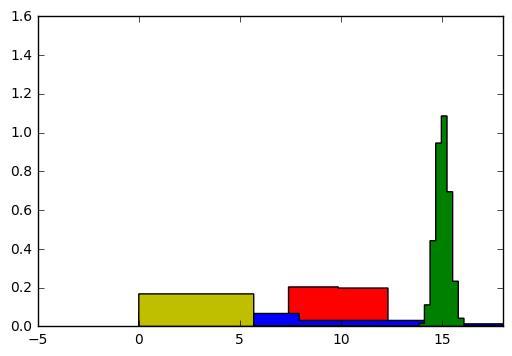

In [20]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
lambda_4_samples = mcmc.trace('lambda_4')[:]
tau_samples = mcmc.trace('tau')[:]
tau_2_samples = mcmc.trace('tau_2')[:]
tau_3_samples = mcmc.trace('tau_3')[:]

plt.hist(lambda_1_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_1$", color='r')
plt.hist(lambda_2_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_2$", color='b')
plt.hist(lambda_3_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_3$", color='y')
plt.hist(lambda_4_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_4$", color='g')
plt.xlim([-5,18])
plt.ylim([0,1.6])
plt.show()

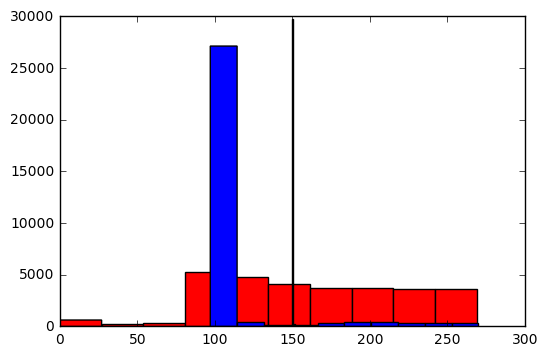

In [18]:
plt.hist(tau_samples, label="posteriro of $\tau$", color='r')
plt.hist(tau_2_samples, label="posteriro of $\tau_2$", color='b')
plt.hist(tau_3_samples, label="posteriro of $\tau_3$", color='y')
plt.show()